## Make predictions – Whether or not a diabetic patient will have further hospital stay.
This is a typical classification problem. We will try several classification methods(Logstic regression, Decision Tree and Random Forrest) and adjust parameters to achieve better performance.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

Some options for Pandas and Seaborn:

In [2]:
# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

Import the processed dataset as a Pandas dataframe

In [3]:
na_values = ['?']
df = pd.read_csv("diabetes_data_processed2.csv", na_values=na_values)
df = df.drop("Unnamed: 0", axis=1)
df_dropna = df.dropna()

In [4]:
df.dtypes

encounter_id                    int64
patient_nbr                     int64
race                            int64
gender                          int64
age                             int64
admission_type_id               int64
discharge_disposition_id        int64
time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
number_outpatient               int64
number_emergency                int64
number_inpatient                int64
number_diagnoses                int64
A1Cresult                       int64
insulin                         int64
change                          int64
diabetesMed                     int64
readmitted                      int64
c_diag1                         int64
c_diag2                         int64
c_diag3                         int64
service_utilization             int64
num_procedures_log1p          float64
service_utilization_log1p     float64
age_log     

In [5]:
df.shape

(29150, 70)

In [6]:
df_dropna.shape

(29150, 70)

### Feature sets for modeling
While there are many possible combinations of features one could test for, we wanted to test three versions — one containing original features, one containing the dummy features and the other with both dummy and log-tranformed features we had created.

In [7]:
train_feature1 = ['race','gender','age','admission_type_id','discharge_disposition_id','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses','A1Cresult','change','diabetesMed','c_diag1','c_diag2','c_diag3','service_utilization','insulin']
train_feature2 = ['race','gender','age','admission_type_id','discharge_disposition_id','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses','change','diabetesMed','c_diag1','c_diag2','c_diag3','number_outpatient','number_emergency','number_inpatient','insulin']
dummy_feature1 = ['gender','age','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses','change','diabetesMed','service_utilization','insulin','race_1','race_2','race_3','race_4', 'race_5','admission_type_id_1','admission_type_id_2','admission_type_id_3','discharge_disposition_id_1','discharge_disposition_id_2','discharge_disposition_id_3','discharge_disposition_id_4','c_diag1_0','c_diag1_1','c_diag1_2','c_diag1_3','c_diag1_4','c_diag1_5','c_diag1_6','c_diag1_7','c_diag1_8','c_diag2_0','c_diag2_1','c_diag2_2', 'c_diag2_3','c_diag2_4','c_diag2_5','c_diag2_6','c_diag2_7','c_diag2_8','c_diag3_0','c_diag3_1','c_diag3_2','c_diag3_3','c_diag3_4','c_diag3_5','c_diag3_6','c_diag3_7','c_diag3_8']
dummy_feature2 = ['gender','age','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses','change','diabetesMed','insulin','number_outpatient','number_emergency','number_inpatient','race_1','race_2','race_3','race_4', 'race_5','admission_type_id_1','admission_type_id_2','admission_type_id_3','discharge_disposition_id_1','discharge_disposition_id_2','discharge_disposition_id_3','discharge_disposition_id_4','c_diag1_0','c_diag1_1','c_diag1_2','c_diag1_3','c_diag1_4','c_diag1_5','c_diag1_6','c_diag1_7','c_diag1_8','c_diag2_0','c_diag2_1','c_diag2_2', 'c_diag2_3','c_diag2_4','c_diag2_5','c_diag2_6','c_diag2_7','c_diag2_8','c_diag3_0','c_diag3_1','c_diag3_2','c_diag3_3','c_diag3_4','c_diag3_5','c_diag3_6','c_diag3_7','c_diag3_8']
log_dummy_feature = ['gender','A1Cresult','change','diabetesMed','num_procedures_log1p','service_utilization_log1p','age_log','num_lab_procedures_log','num_medications_log','time_in_hospital_log','number_diagnoses_log','insulin','race_1','race_2','race_3','race_4', 'race_5','admission_type_id_1','admission_type_id_2','admission_type_id_3','discharge_disposition_id_1','discharge_disposition_id_2','discharge_disposition_id_3','discharge_disposition_id_4','c_diag1_0','c_diag1_1','c_diag1_2','c_diag1_3','c_diag1_4','c_diag1_5','c_diag1_6','c_diag1_7','c_diag1_8','c_diag2_0','c_diag2_1','c_diag2_2', 'c_diag2_3','c_diag2_4','c_diag2_5','c_diag2_6','c_diag2_7','c_diag2_8','c_diag3_0','c_diag3_1','c_diag3_2','c_diag3_3','c_diag3_4','c_diag3_5','c_diag3_6','c_diag3_7','c_diag3_8']
log_feature = ['gender','A1Cresult','change','diabetesMed','num_procedures_log1p','age_log','num_lab_procedures_log','num_medications_log','time_in_hospital_log','number_diagnoses_log','insulin', 'number_outpatient','number_emergency','number_inpatient']

In [8]:
df0 = df[(df['readmitted'] == 0)]

In [9]:
df1 = df[(df['readmitted'] == 1)]

In [10]:
df1.shape

(2766, 70)

In [11]:
from sklearn.utils import resample
df2=resample(df0, n_samples=2766, random_state=42, replace=False)
#df2.describe()
df1.describe()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,A1Cresult,insulin,change,diabetesMed,readmitted,c_diag1,c_diag2,c_diag3,service_utilization,num_procedures_log1p,service_utilization_log1p,age_log,num_lab_procedures_log,num_medications_log,time_in_hospital_log,number_diagnoses_log,race_1,race_2,race_3,race_4,race_5,admission_type_id_1,admission_type_id_2,admission_type_id_3,discharge_disposition_id_1,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,c_diag1_0,c_diag1_1,c_diag1_2,c_diag1_3,c_diag1_4,c_diag1_5,c_diag1_6,c_diag1_7,c_diag1_8,c_diag2_0,c_diag2_1,c_diag2_2,c_diag2_3,c_diag2_4,c_diag2_5,c_diag2_6,c_diag2_7,c_diag2_8,c_diag3_0,c_diag3_1,c_diag3_2,c_diag3_3,c_diag3_4,c_diag3_5,c_diag3_6,c_diag3_7,c_diag3_8
count,2.766000e+03,2.766000e+03,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.0,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000
mean,1.402129e+08,5.267550e+07,1.307303,0.446132,64.313087,1.424440,1.485177,4.450108,43.379610,1.262111,15.891902,0.301157,0.201012,0.592914,6.931309,-79.634852,-40.721620,0.511931,0.806580,1.0,2.659436,2.459870,2.608821,1.095083,0.600370,0.484848,4.124868,3.551206,2.630802,1.265996,1.886266,0.759219,0.203543,0.020246,0.004700,0.012292,0.696674,0.182213,0.121114,0.645336,0.286334,0.006146,0.062184,0.160521,0.271511,0.098698,0.068330,0.219089,0.063630,0.060014,0.034707,0.023500,0.230296,0.247289,0.059653,0.028561,0.335503,0.013738,0.018077,0.046638,0.020246,0.222343,0.185828,0.033984,0.024584,0.475777,0.006508,0.015907,0.030369,0.004700
std,9.418705e+07,3.853072e+07,0.655149,0.497180,16.002880,0.697634,0.797122,2.921555,19.605968,1.627851,8.117061,1.031184,0.758374,1.263999,2.008386,39.461388,49.284301,0.499948,0.395051,0.0,2.161406,2.153348,1.968536,1.999457,0.633757,0.640704,0.299803,0.884874,0.549758,0.704316,0.330586,0.427635,0.402706,0.140866,0.068407,0.110206,0.459778,0.386089,0.326318,0.478498,0.452129,0.078170,0.241532,0.367155,0.444820,0.298311,0.252356,0.413704,0.244136,0.237557,0.183070,0.151511,0.421099,0.431514,0.236886,0.166600,0.472251,0.116423,0.133253,0.210900,0.140866,0.415895,0.389038,0.181221,0.154882,0.499503,0.080421,0.125140,0.171631,0.068407
min,4.092600e+04,1.314000e+03,1.000000,0.000000,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,-99.000000,-99.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.708050,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.676663e+07,2.015201e+07,1.000000,0.000000,55.000000,1.000000,1.000000,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,-99.000000,-99.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.007333,3.465736,2.302585,0.693147,1.609438,1.000000,0

In [12]:
list1=[df2, df1]
df4=pd.concat(list1)

In [13]:
df5=resample(df0, n_samples=10000, random_state=42, replace=False)
list2=[df5,df1]
df6=pd.concat(list2)

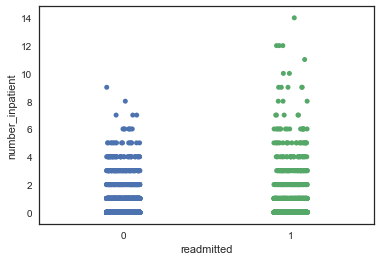

In [14]:
sns.stripplot(x="readmitted", y="number_inpatient", data=df6, jitter=True);

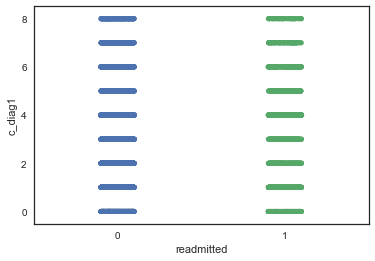

In [15]:
sns.stripplot(x="readmitted", y="c_diag1", data=df6, jitter=True);

In [16]:
df4.describe()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,A1Cresult,insulin,change,diabetesMed,readmitted,c_diag1,c_diag2,c_diag3,service_utilization,num_procedures_log1p,service_utilization_log1p,age_log,num_lab_procedures_log,num_medications_log,time_in_hospital_log,number_diagnoses_log,race_1,race_2,race_3,race_4,race_5,admission_type_id_1,admission_type_id_2,admission_type_id_3,discharge_disposition_id_1,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,c_diag1_0,c_diag1_1,c_diag1_2,c_diag1_3,c_diag1_4,c_diag1_5,c_diag1_6,c_diag1_7,c_diag1_8,c_diag2_0,c_diag2_1,c_diag2_2,c_diag2_3,c_diag2_4,c_diag2_5,c_diag2_6,c_diag2_7,c_diag2_8,c_diag3_0,c_diag3_1,c_diag3_2,c_diag3_3,c_diag3_4,c_diag3_5,c_diag3_6,c_diag3_7,c_diag3_8
count,5.532000e+03,5.532000e+03,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000
mean,1.448151e+08,5.158047e+07,1.335322,0.453001,63.163413,1.419920,1.402205,4.125271,42.321584,1.231381,15.181670,0.286515,0.157267,0.427874,6.683659,-78.244215,-42.303326,0.502892,0.803688,0.500000,2.655821,2.422090,2.614967,0.871656,0.584968,0.398548,4.102713,3.512148,2.582209,1.183660,1.845654,0.743854,0.211858,0.024042,0.005604,0.014642,0.695589,0.188901,0.115510,0.723066,0.210954,0.006688,0.059291,0.157809,0.261931,0.117860,0.074657,0.210412,0.055676,0.062003,0.035069,0.024584,0.233369,0.248012,0.062364,0.030188,0.332972,0.011931,0.017354,0.047361,0.016450,0.222885,0.183116,0.030007,0.027296,0.480658,0.005785,0.016992,0.029646,0.003615
std,9.697335e+07,3.892860e+07,0.693094,0.497831,16.286734,0.688979,0.780815,2.827026,19.579224,1.621243,7.905224,1.042131,0.656136,1.030736,2.043745,40.497894,49.528551,0.500037,0.397243,0.500045,2.152926,2.127785,1.960184,1.770450,0.633921,0.593574,0.320916,0.917029,0.553242,0.704805,0.342068,0.436543,0.408662,0.153193,0.074655,0.120126,0.460199,0.391465,0.319665,0.447524,0.408023,0.081516,0.236191,0.364595,0.439725,0.322471,0.262860,0.407638,0.229316,0.241183,0.183970,0.154868,0.423014,0.431898,0.241838,0.171120,0.471319,0.108584,0.130597,0.212429,0.127209,0.416219,0.386797,0.170623,0.162959,0.499671,0.075843,0.129253,0.169623,0.060024
min,2.823600e+04,1.314000e+03,1.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.945776e+07,1.976418e+07,1.000000,0.000000,55.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,-99.000000,-99.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.007333,3.433987,2.302585,0.69

In [73]:
train_x = df4[train_feature2]
train_y = df4['readmitted']
train_x.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,c_diag1,c_diag2,c_diag3,number_outpatient,number_emergency,number_inpatient,insulin
10140,1,1,65,1,1,8,48,1,37,9,0,1,7,7,4,0,0,0,-99
473,1,1,45,1,1,3,40,1,11,4,1,1,4,0,0,0,0,0,1
4675,1,0,65,2,4,4,35,1,31,4,0,1,6,1,4,0,0,0,-99
26106,1,0,85,2,2,6,56,1,21,4,1,1,5,0,4,0,0,0,-99
12667,5,0,45,1,1,3,49,0,24,9,1,1,3,3,4,0,0,0,2
19525,1,0,55,1,1,5,59,1,20,5,1,1,0,4,0,0,0,0,0
20759,1,0,75,1,2,3,71,0,12,6,1,1,4,0,7,0,0,0,0
3163,2,1,65,3,1,4,23,2,12,3,0,0,3,0,4,0,0,0,-99
8286,1,0,75,1,1,3,55,2,14,6,1,1,3,4,1,0,2,0,-99
28664,1,0,85,1,1,2,35,0,18,8,0,1,2,4,0,3,0,0,-99


In [74]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_y)))
smt = SMOTE(random_state=20, kind='borderline1')
train_x_new, train_y_new = smt.fit_sample(train_x, train_y)
print('New dataset shape {}'.format(Counter(train_y_new)))

Original dataset shape Counter({0: 2766, 1: 2766})
New dataset shape Counter({0: 2766, 1: 2766})


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=42)
print('Original dataset shape {}'.format(Counter(Y_test)))
#X_train1, X_test1, Y_train1, Y_test1 = train_test_split(train_x_new, train_y_new, test_size=0.9, random_state=0)
#print('New dataset shape {}'.format(Counter(Y_train1)))

Original dataset shape Counter({0: 297, 1: 257})


In [20]:
X_train.to_csv('./x_train.csv')
Y_train.to_csv('./y_train.csv')
tem_df=pd.read_csv("tem3.txt")
tem_df0 = tem_df[(tem_df['readmitted'] == 0)]
tem_df1 = tem_df[tem_df['readmitted'] == 1]
tem_df1.shape
from sklearn.utils import resample
tem_df2=resample(tem_df0, n_samples=2738, random_state=42, replace=False)
tem_df2.shape
list1=[tem_df2, tem_df1]
tem_df4=pd.concat(list1)
train_x = tem_df4[train_feature2]
train_y = tem_df4['readmitted']

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_leaf_nodes=28, criterion = "entropy",min_samples_leaf=5, min_samples_split=5 )
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, X_train, Y_train, cv=9))))
dte.fit(X_train, Y_train)

Cross Validation score: 60.93%


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=28,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, max_leaf_nodes=16, n_jobs=-1)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(RF, X_train , Y_train, cv=9))))
RF.fit(X_train, Y_train)

Cross Validation score: 61.51%


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(GB, X_train, Y_train, cv=9))))
GB.fit(X_train, Y_train)

Cross Validation score: 56.49%


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [54]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',gamma=5,C=0.001)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(svc, X_train, Y_train, cv=10))))
svc.fit(X_train, Y_train)

Cross Validation score: 50.58%


SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [110]:
###from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
a=cross_val_score(RF, train_x, train_y, cv=9, scoring="accuracy")
p=cross_val_score(RF, train_x, train_y, cv=9, scoring="precision")
r=cross_val_score(RF, train_x, train_y, cv=9, scoring="recall")
display_scores(a)

Scores: [0.6557377  0.59344262 0.60690789 0.625      0.63157895 0.61019737
 0.65460526 0.61019737 0.61348684]
Mean: 0.6223504457865976
Standard deviation: 0.020263158545321274


In [111]:
display_scores(p)

Scores: [0.65635739 0.6185567  0.60606061 0.61764706 0.62007168 0.6192053
 0.63636364 0.62585034 0.64705882]
Mean: 0.6274635040957084
Standard deviation: 0.015119018514792519


In [112]:
display_scores(r)

Scores: [0.62295082 0.60983607 0.5625     0.66447368 0.61842105 0.60197368
 0.65789474 0.59539474 0.60526316]
Mean: 0.615411993097498
Standard deviation: 0.02942555376114493


In [34]:
p=RF.predict_proba(X_train)[:,0]
threshold = 0.5
#vfunc = np.vectorize(lambda el: 1.0 if el >= threshold else 0.0)
#y_train_pred = vfunc(p)
#y_train_pred
np.savetxt("train_probability.txt", p)

In [33]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(RF, X_train, Y_train, cv=9)
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(Y_train, y_scores)

In [63]:
y_scores = RF.predict(X_test)
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(Y_test, y_scores)

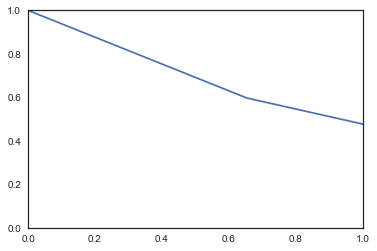

In [64]:
def plot_precision_recall(precisions, recalls):
    plt.plot(recalls, precisions)
    plt.ylim([0,1])
    plt.xlim([0,1])
    
plot_precision_recall(precisions, recalls)
plt.show()

In [32]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(RF, X_train, Y_train, cv=9)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_train_pred)


array([[1294,  893],
       [ 797, 1441]])

In [34]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(Y_train, y_train_pred))
print(recall_score(Y_train, y_train_pred))

0.617395029991431
0.6438784629133154


In [66]:
from sklearn.metrics import f1_score
f1_score(Y_train, y_train_pred)

0.5910154422087038

In [113]:
y_test_predict = RF.predict(X_test)

In [114]:
confusion_matrix(Y_test, y_test_predict)

array([[176,  88],
       [ 10,  18]])

In [115]:
from sklearn.metrics import roc_auc_score
print(precision_score(Y_test, y_test_predict))
print(recall_score(Y_test, y_test_predict))
print(accuracy_score(Y_test, y_test_predict))
roc_auc_score(Y_test, y_test_predict)

0.16981132075471697
0.6428571428571429
0.6643835616438356


0.6547619047619049

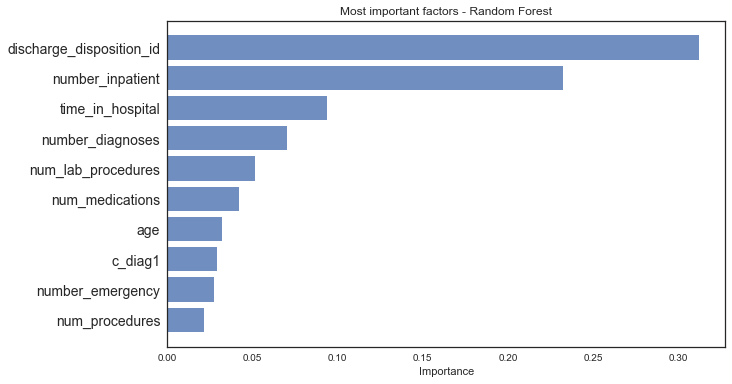

In [105]:
# Shot top most features based on importance
feature_names = train_feature2
feature_imports = RF.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
most_imp_features.to_csv('./features_importance.csv')
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important factors - Random Forest')
plt.show()

In [100]:
lr = LogisticRegression(penalty='l2')
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(lr, X_train, Y_train, cv=9))))
lr.fit(X_train, Y_train)

Cross Validation score: 60.01%


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(lr, X_train, Y_train, cv=9)

In [37]:
confusion_matrix(Y_train, y_train_pred)

array([[1608,  861],
       [1130, 1379]])

In [38]:
print(precision_score(Y_train, y_train_pred))
print(recall_score(Y_train, y_train_pred))
f1_score(Y_train, y_train_pred)

NameError: name 'precision_score' is not defined

In [39]:
y_test_predict = lr.predict(X_test)

In [40]:
confusion_matrix(Y_test, y_test_predict)

array([[198,  99],
       [ 97, 160]])

In [41]:
print(precision_score(Y_test, y_test_predict))
print(recall_score(Y_test, y_test_predict))
f1_score(Y_test, y_test_predict)

NameError: name 'precision_score' is not defined

In [101]:
from sklearn.metrics import roc_curve
fpr, tpr,_=roc_curve(lr.predict(X_test),Y_test,drop_intermediate=False)

In [102]:
y_score = RF.predict_proba(X_test)[:,1]

In [103]:
y_test_reshape = Y_test.reshape(-1, 1)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_reshape,y_score)

/Users/qizhihua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


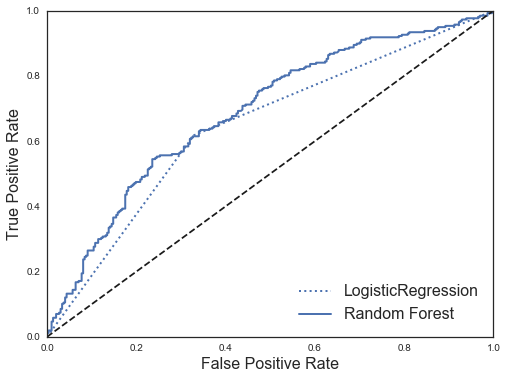

In [104]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="LogisticRegression")
plot_roc_curve(fpr_dt, tpr_dt, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()